## Regularization

* reduce overfitting
* humans often overfits,

In [3]:
from helpfulfunc import *
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
# Setup Data
filepath = '../data/auto-mpg.csv'
df_ = pd.read_csv(filepath, na_values=['NA', '?'])

missing_median(df_, 'horsepower')
df_.drop('name',axis=1, inplace=True)

# zscore the data
is_zscore = False
if is_zscore:
    encode_numeric_zscore(df_, 'horsepower')
    encode_numeric_zscore(df_, 'weight')
    encode_numeric_zscore(df_, 'cylinders')
    encode_numeric_zscore(df_, 'displacement')
    encode_numeric_zscore(df_, 'acceleration')


In [5]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
        
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df_, 'origin')

In [6]:
x, y = to_xy(df_, 'mpg')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=43)

In [7]:
# Function evaluate the coefficients of regression
%matplotlib inline
from IPython.display import display, HTML

def report_coef(names, coef, intercept):
    r = pd.DataFrame({'coef': coef, 'positive': coef>=0}, index=names)
    r = r.sort_values(by=['coef'])
    display(r)
    print('Intercept : {}'.format(intercept))
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

## Linear Regression

In [24]:
import sklearn 

# create a regressor 
regressor = sklearn.linear_model.LinearRegression()

# Fit/train the linear regression
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Final score (RMSE): 3.267441749572754


,coef,positive
origin-1,-2.170928,False
cylinders,-0.535815,False
horsepower,-0.019640,False
weight,-0.007381,False
displacement,0.030546,True
acceleration,0.044243,True
year,0.784904,True
origin-2,1.057159,True
origin-3,1.113770,True


Intercept : [-15.054094]


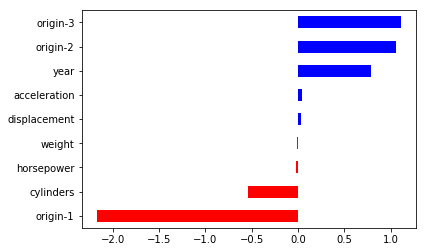

In [27]:
pred = regressor.predict(x_test)

# Measure the RMSE error, 
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print('Final score (RMSE): {}'.format(score))

name = list(df_.columns.values)
name.remove('mpg')

report_coef(
    name,
    regressor.coef_[0,:],
    regressor.intercept_
)

### L1 - Regularization

L1 regularization known as LASSO(Least Absolute Shrinkage and Selection Operator) used to create sparsity in the neural network. 

$E_1 = \alpha\sum_w|w|$

the score (RMSE) of lasso :  3.2269242


,coef,positive
origin-1,-2.361377,False
cylinders,-0.074118,False
horsepower,-0.014870,False
weight,-0.007401,False
origin-2,0.000000,True
origin-3,0.000000,True
acceleration,0.016326,True
displacement,0.018801,True
year,0.768853,True


Intercept : [-13.547647]


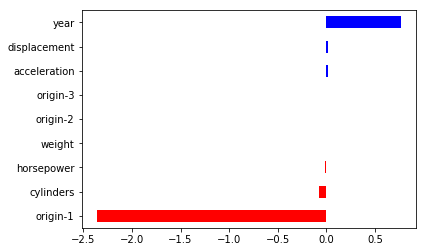

In [29]:
from sklearn.linear_model import Lasso

regressor_l1 = Lasso(random_state=0, alpha=0.1)

# Fit the LASSO
regressor_l1.fit(x_train, y_train)

# prediction
y_pred = regressor_l1.predict(x_test)

# RMSE 
score = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print('the score (RMSE) of lasso : ', score)

report_coef(
    name,
    regressor_l1.coef_,
    regressor_l1.intercept_
)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

/home/liy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/liy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/liy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/liy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

(1e-08, 100000000.0)

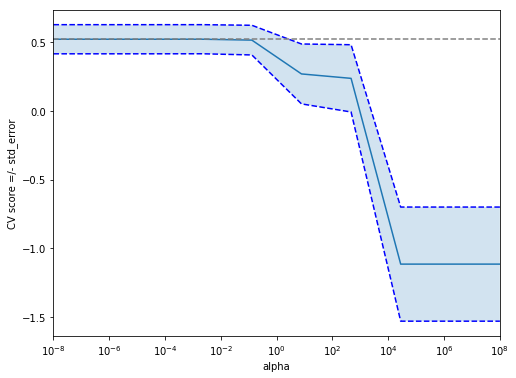

In [33]:
lasso = Lasso(random_state=43)
alphas = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    tmp_score = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(tmp_score))
    scores_std.append(np.std(tmp_score))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# Plot error lines showing +/- std. errors of scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')

# alpha= 0.2 control the translucency of the fill color
plt.fill_between(alphas, scores+std_error, scores-std_error, alpha=0.2)

plt.ylabel('CV score =/- std_error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='0.5')
plt.xlim([alphas[0], alphas[-1]])


### L2 Regularization

$E_2 = \alpha\sum_ww^2$ the bias values are not summed

In [34]:
from sklearn.linear_model import Ridge

score (RMSE) of Ridge:  3.2635188


/home/liy/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.174046885907501e-09 / 5.960464477539063e-08
  RuntimeWarning)


,coef,positive
origin-1,-2.130505,False
cylinders,-0.524989,False
horsepower,-0.019231,False
weight,-0.007384,False
displacement,0.030083,True
acceleration,0.044142,True
year,0.784199,True
origin-2,1.035769,True
origin-3,1.095250,True


Intercept : [-15.019022]


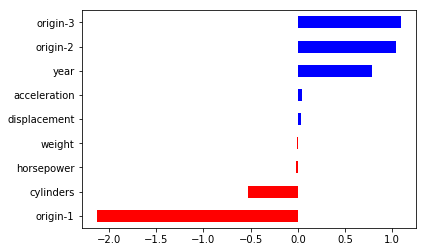

In [38]:
regressor_l2 = Ridge(alpha=1)

regressor_l2.fit(x_train, y_train)
pred = regressor_l2.predict(x_test)

# measure the rmse error,
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print('score (RMSE) of Ridge: ', score)

names = list(df_.columns.values)
names.remove('mpg')

report_coef(
    names,
    regressor_l2.coef_[0,:],
    regressor_l2.intercept_
)

In [15]:
import sklearn
from sklearn.linear_model import ElasticNet
from sklearn import metrics

# Create the linear regression
regressor_en = ElasticNet(alpha=0.1, l1_ratio=0.1)

# fit and train
regressor_en.fit(x_train, y_train)

# Prediction
pred = regressor_en.predict(x_test)

# evaluation
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("the score (RMSE) of ElasticNet : ", score)



the score (RMSE) of ElasticNet :  3.21719


In [1]:
# add l1/l2 regulazition on the deep learning frameworks

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping


In [10]:
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01), activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=0, epochs=1000)

pred = model.predict(x_test)

score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("score rmse of deep : ", score)

Epoch 00137: early stopping
score rmse of deep :  4.23165


## Dropout Regularization

The usual hyper_parameters for a dropout layer :
* Neuron Count
* Activation Function
* Dropout Probability

To make use of Dropout in keras, use the dropout layer and a specify a dropout probability, usually 0.1



In [11]:
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=1000)

Train on 298 samples, validate on 100 samples
Epoch 1/1000
0s - loss: 2683.3147 - val_loss: 1279.4306
Epoch 2/1000
0s - loss: 777.9419 - val_loss: 524.3554
Epoch 3/1000
0s - loss: 633.2416 - val_loss: 183.6516
Epoch 4/1000
0s - loss: 506.5946 - val_loss: 127.0829
Epoch 5/1000
0s - loss: 335.9870 - val_loss: 141.7946
Epoch 6/1000
0s - loss: 196.3164 - val_loss: 125.3130
Epoch 7/1000
0s - loss: 338.9602 - val_loss: 133.3084
Epoch 8/1000
0s - loss: 289.9371 - val_loss: 122.4099
Epoch 9/1000
0s - loss: 255.5219 - val_loss: 122.2564
Epoch 10/1000
0s - loss: 241.6159 - val_loss: 124.2774
Epoch 11/1000
0s - loss: 241.0200 - val_loss: 121.5120
Epoch 12/1000
0s - loss: 296.4752 - val_loss: 122.2951
Epoch 13/1000
0s - loss: 263.5660 - val_loss: 114.9086
Epoch 14/1000
0s - loss: 219.6706 - val_loss: 112.8674
Epoch 15/1000
0s - loss: 258.9238 - val_loss: 117.0905
Epoch 16/1000
0s - loss: 255.3397 - val_loss: 114.9751
Epoch 17/1000
0s - loss: 242.5361 - val_loss: 126.6134
Epoch 18/1000
0s - loss: 1

In [12]:
pred = model.predict(x_test)
np.sqrt(metrics.mean_squared_error(pred, y_test))

8.3416147